## Régression linéaire sur le Dataset Boston Housing 

Importont les librairies nécessaires

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

### Compréhension des données

In [3]:
from sklearn.datasets import load_boston
donnees_boston = load_boston()

In [4]:
donnees_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [9]:
#On affiche la description du jeuy de données
donnees_boston.DESCR.split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [12]:
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
#on affiche les 5 premières lignes
donnees_boston_df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
#on créé une nouvelle colonne qui est PRIX. ce qui equivaut à MEDV du jeu de données
donnees_boston_df['PRIX'] = donnees_boston.target
#on vérifie s'il n'y pas des valeurs nulles
donnees_boston_df.isnull().sum()



CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRIX       0
dtype: int64

### Création du modèle

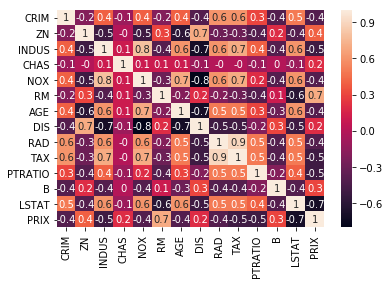

In [16]:
#etude de la correlation
matrice_corr = donnees_boston_df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [18]:
#on utilise seulement 4 variables explicatives
X = pd.DataFrame(np.c_[donnees_boston_df['LSTAT'], donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = donnees_boston_df['PRIX']

In [19]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [20]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur quadratique moyenne est 5.303422189850911
le score R2 est 0.6725758894106004


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 4.897434387599182
le score R2 est 0.6936559148531631
